In [2]:
import os
import requests
import pandas as pd
import json
from api_keys import census_api_key
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#define years
years = [2019, 2020, 2021, 2022, 2023]
variables1 = ["B19013_001E", #median household income
              "B25077_001E", #median home value
              "B25064_001E" #median gross rent
              ]
#create list to hold all the data returned
all_data = []

for year in years:
    #Set the base URL
    url = f"http://api.census.gov/data/{year}/acs/acs5" 
    #Set the Params
    params = {
    "get" : f"NAME,{','.join(variables1)}",   #requests the county name and variables
    "for" : "county:005,051,067",   #specific counties Clackamas, Multnomah, Washington
    "in" : "state:41",         #Oregon
    "key" : census_api_key
}


# Make the API request
    response = requests.get(url, params=params)
    census_data = response.json()
    for row in census_data[1:]:
        row_with_year = row + [year]
        all_data.append(row_with_year)
    # print(json.dumps(all_data, indent=4))


In [4]:
column_header = census_data[0] + ["Year"]
rows = all_data[1]
census_data_df = pd.DataFrame(all_data, columns=column_header)
#Rename columns
census_data_df = census_data_df.rename(columns={'NAME': 'County', 'B19013_001E': 'Median Household Income',  'B25077_001E': 'Median Home Value',
              'B25064_001E': 'Median Gross Rent', 'state': 'State Code', 'county': 'County Code'})
cleaned_median_income_df = census_data_df.drop(columns=["State Code", "County Code"])
cleaned_median_income_df

,County,Median Household Income,Median Home Value,Median Gross Rent,Year
0,"Washington County, Oregon",82215,386600,1359,2019
1,"Clackamas County, Oregon",80484,395100,1295,2019
2,"Multnomah County, Oregon",69176,386200,1237,2019
3,"Clackamas County, Oregon",82911,421100,1356,2020
4,"Multnomah County, Oregon",71425,410800,1309,2020
5,"Washington County, Oregon",86626,413500,1440,2020
6,"Clackamas County, Oregon",88517,452200,1447,2021
7,"Multnomah County, Oregon",76290,437600,1394,2021
8,"Washington County, Oregon",92025,439300,1541,2021
9,"Clackamas County, Oregon",95740,532200,1605,2022


In [5]:
#Export to CSV file
cleaned_median_income_df.to_csv("output_file/income_vs_home_rent.csv", index=False)


# Preparing code for graphs

In [6]:
cleaned_median_income_df.dtypes

County                     object
Median Household Income    object
Median Home Value          object
Median Gross Rent          object
Year                        int64
dtype: object

In [7]:
# Convert columns to integers
converted = cleaned_median_income_df.astype({
    'Median Household Income': 'int',
    'Median Home Value': 'int',
    'Median Gross Rent': 'int'
})
#check dtypes
converted.dtypes

County                     object
Median Household Income     int64
Median Home Value           int64
Median Gross Rent           int64
Year                        int64
dtype: object

In [8]:
df = converted
#Calculate PIR and RIR and add column to df
df["Price-to-Income Ratio"] = df['Median Home Value']/ df['Median Household Income']
df["Rent-to-Income Ratio"] = ((df['Median Gross Rent']*12) / df['Median Household Income']) * 100
df.head()

,County,Median Household Income,Median Home Value,Median Gross Rent,Year,Price-to-Income Ratio,Rent-to-Income Ratio
0,"Washington County, Oregon",82215,386600,1359,2019,4.702305,19.835796
1,"Clackamas County, Oregon",80484,395100,1295,2019,4.909050,19.308185
2,"Multnomah County, Oregon",69176,386200,1237,2019,5.582861,21.458309
3,"Clackamas County, Oregon",82911,421100,1356,2020,5.078940,19.625864
4,"Multnomah County, Oregon",71425,410800,1309,2020,5.751488,21.992300


In [12]:
#export csv
df.to_csv('cleaned_home_values.csv', index=False)

# Affordability Graph 1 : Price to Income Ratio

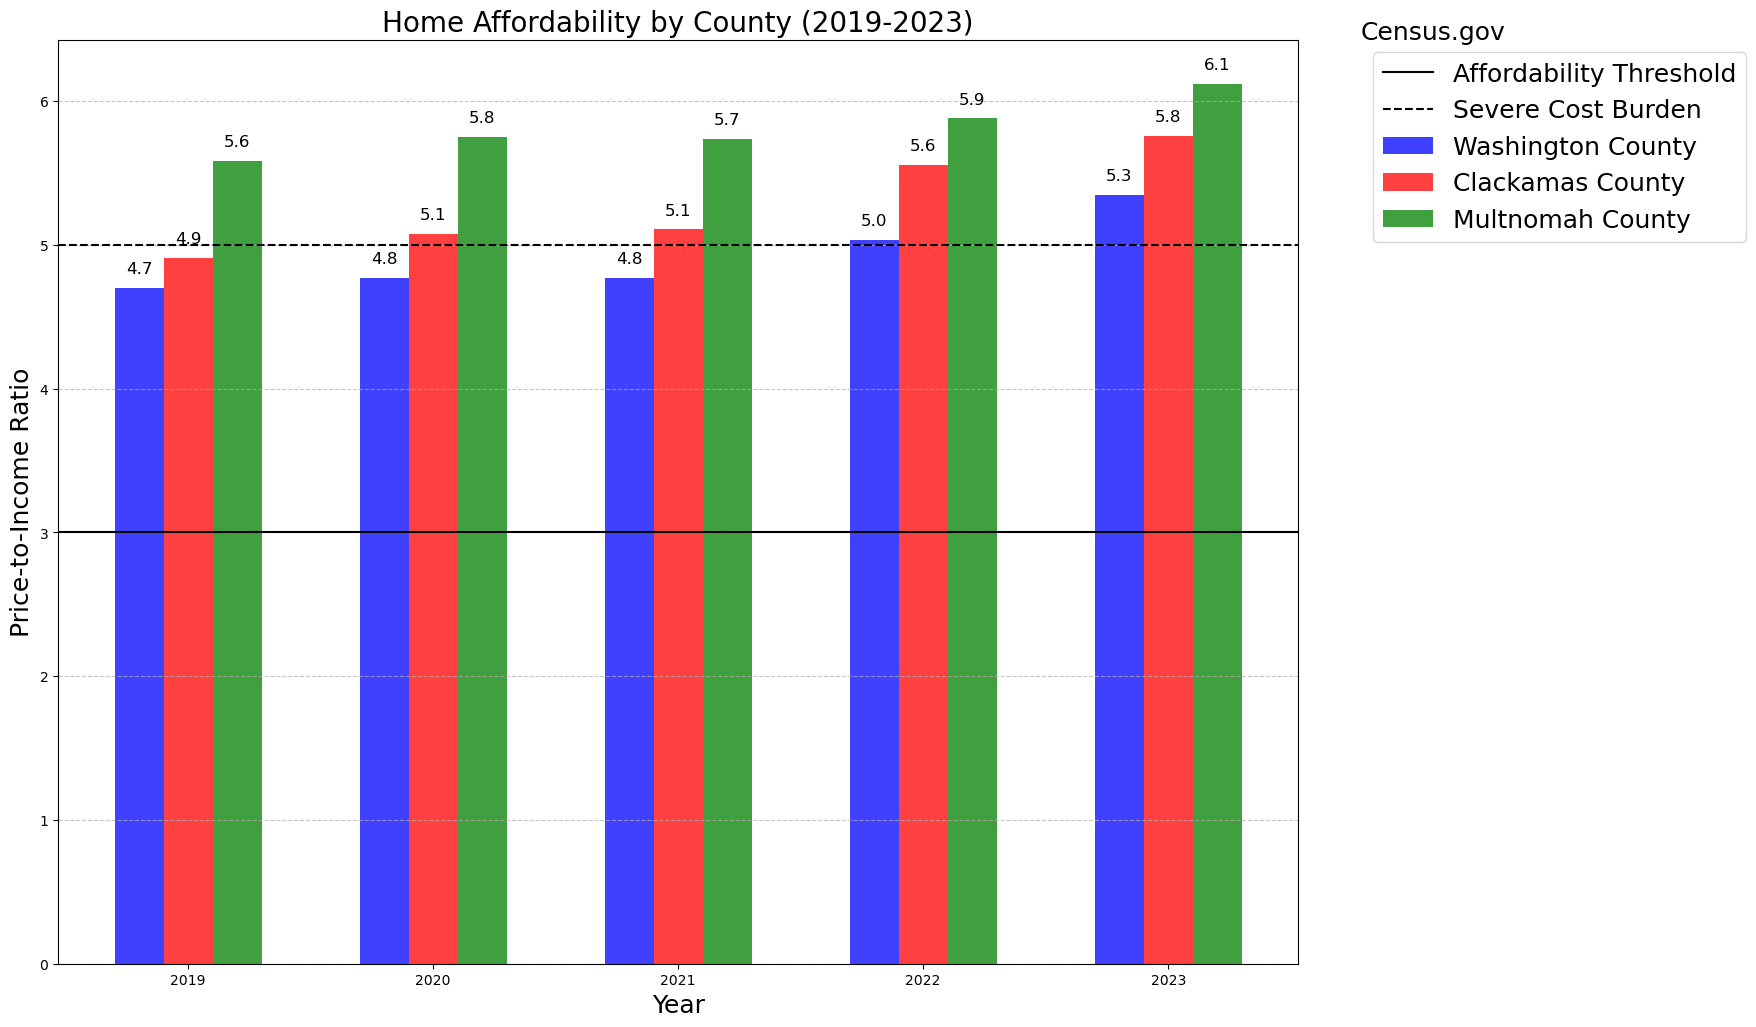

In [10]:
washington_df = df[df['County']=='Washington County, Oregon']
clackamas_df = df[df['County']=='Clackamas County, Oregon']
multnomah_df = df[df['County']=='Multnomah County, Oregon']

plt.figure(figsize=(16, 12))
plt.bar(washington_df['Year'] - 0.2, washington_df['Price-to-Income Ratio'], width=0.2, color='blue', alpha=.75, label='Washington County')
plt.bar(clackamas_df['Year'], clackamas_df['Price-to-Income Ratio'], width=0.2, color='red', alpha=.75, label='Clackamas County')
plt.bar(multnomah_df['Year'] + 0.2, multnomah_df['Price-to-Income Ratio'], width=0.2, color='green', alpha=.75, label='Multnomah County')

# Add value labels above bars
for i, year in enumerate(washington_df['Year']):
    plt.text(year - 0.2, washington_df.iloc[i]['Price-to-Income Ratio'] + 0.1, 
             f"{washington_df.iloc[i]['Price-to-Income Ratio']:.1f}", ha='center', fontsize=12)

for i, year in enumerate(clackamas_df['Year']):
    plt.text(year, clackamas_df.iloc[i]['Price-to-Income Ratio'] + 0.1, 
             f"{clackamas_df.iloc[i]['Price-to-Income Ratio']:.1f}", ha='center', fontsize=12)

for i, year in enumerate(multnomah_df['Year']):
    plt.text(year + 0.2, multnomah_df.iloc[i]['Price-to-Income Ratio'] + 0.1, 
             f"{multnomah_df.iloc[i]['Price-to-Income Ratio']:.1f}", ha='center', fontsize=12)

plt.xlabel("Year", fontsize = 18)
plt.ylabel("Price-to-Income Ratio", fontsize = 18)
plt.title("Home Affordability by County (2019-2023)", fontsize = 20)
plt.axhline(y=3, color="black", linestyle="solid", label="Affordability Threshold")
plt.axhline(y=5, color="black", linestyle="dashed", label="Severe Cost Burden")

plt.legend(loc='best', bbox_to_anchor=(1.05,1), fontsize=18)
plt.text(1.05,1,"Census.gov",transform=plt.gca().transAxes, fontsize=18)
plt.grid(axis="y",linestyle="--", alpha=0.7)

plt.show()


# Affordability Graph 2: Rent to Income Ratio

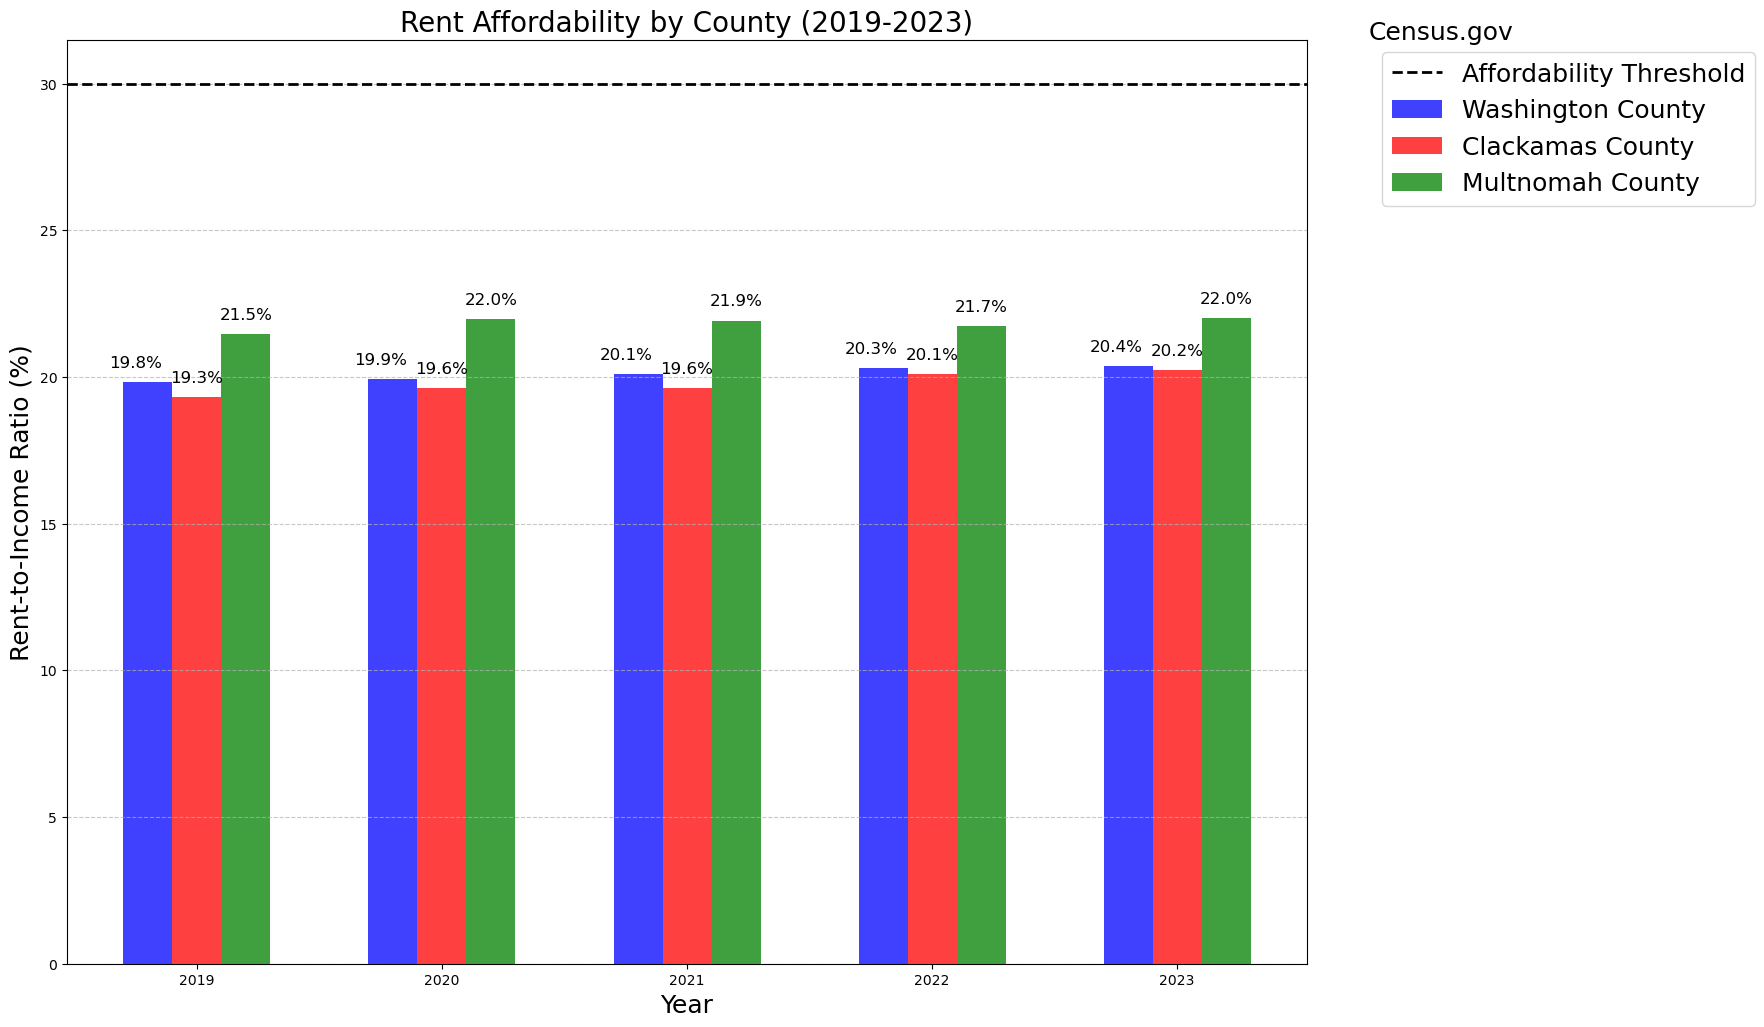

In [11]:
plt.figure(figsize=(16, 12))
plt.bar(washington_df['Year'] - 0.2, washington_df['Rent-to-Income Ratio'], width=0.2, color='blue', alpha=.75, label='Washington County')
plt.bar(clackamas_df['Year'], clackamas_df['Rent-to-Income Ratio'], width=0.2, color='red', alpha=.75, label='Clackamas County')
plt.bar(multnomah_df['Year'] + 0.2, multnomah_df['Rent-to-Income Ratio'], width=0.2, color='green', alpha=.75, label='Multnomah County')

plt.xlabel("Year", fontsize = 18)
plt.ylabel("Rent-to-Income Ratio (%)", fontsize = 18)
plt.title("Rent Affordability by County (2019-2023)", fontsize = 20)
plt.axhline(y=30, color="black", linestyle="dashed", linewidth=2, label="Affordability Threshold")

# Add value labels above bars
for i, year in enumerate(washington_df['Year']):
    plt.text(year - 0.25, washington_df.iloc[i]['Rent-to-Income Ratio'] + 0.5, 
             f"{washington_df.iloc[i]['Rent-to-Income Ratio']:.1f}%", ha='center', fontsize=12)

for i, year in enumerate(clackamas_df['Year']):
    plt.text(year, clackamas_df.iloc[i]['Rent-to-Income Ratio'] + 0.5, 
             f"{clackamas_df.iloc[i]['Rent-to-Income Ratio']:.1f}%", ha='center', fontsize=12)

for i, year in enumerate(multnomah_df['Year']):
    plt.text(year + 0.2, multnomah_df.iloc[i]['Rent-to-Income Ratio'] + 0.5, 
             f"{multnomah_df.iloc[i]['Rent-to-Income Ratio']:.1f}%", ha='center', fontsize=12)
    
plt.legend(loc='best', bbox_to_anchor=(1.05,1), fontsize=18)
plt.text(1.05,1,"Census.gov",transform=plt.gca().transAxes, fontsize=18)
plt.grid(axis="y",linestyle="--", alpha=0.7)

plt.show()